In [1]:
import os, sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="1,2" 
import keras
import sent2vec
import seq2seq
from seq2seq.models import AttentionSeq2Seq
from seq2seq.models import Seq2Seq
from keras.utils import multi_gpu_model
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import shutil
import pickle
import tqdm
from tqdm import tqdm
import math

import numpy as np
from random import shuffle
from math import log, floor
import pandas as pd
import tensorflow as tf
import tensorboard as tb
from keras import backend as K
from keras.models import *
from keras.layers import *
from keras.activations import *
from keras.callbacks import *
from keras.utils import *
from keras.layers.advanced_activations import *
from keras import *
from keras.engine.topology import *
from keras.optimizers import *
import gensim
from gensim.models.word2vec import *
from keras.preprocessing.text import *
from keras.preprocessing.sequence import *
from keras.utils import *
from sklearn.model_selection import *
import random
from random import shuffle
import re
from operator import itemgetter
from keras.utils.generic_utils import *
from keras import regularizers
import string
import unicodedata as udata
import pickle
from keras.applications import *
from keras.preprocessing.image import *
import pause, datetime
import matplotlib.pyplot as plt
from sklearn.naive_bayes import *
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import functools

Using TensorFlow backend.


In [160]:
training = pd.read_csv('data/reg_data_token.csv')
voc_list = training.text.tolist()
voc_list_str = [str(x) for x in voc_list]
# voc_list_len = [len(x) for x in voc_list_str]
voc_string = ''.join(voc_list_str)
voc_set = set(voc_string.split(' '))
try:
    voc_set.remove('')
except:
    pass
print('   ',len(voc_set))
voc_set

    111023


{'henningsen',
 'hammermann',
 'izvxeiprjn',
 'rechtstreek',
 'worsley',
 'bastrykin',
 'revolutioni',
 'reach',
 'cistercensi',
 'xl',
 'antioch',
 'morguli',
 'hofft',
 'rollback',
 'excess',
 'luen',
 'monetizaci',
 'swa',
 'tutankhamun',
 'motoko',
 'feh',
 'naonwant',
 'zenko',
 'simeon',
 'cheeah',
 'signif',
 'unrip',
 'igeprev',
 'resent',
 'pdv',
 'fgjsuog',
 'troubadour',
 'hugger',
 'uhg',
 'jnplnrlefp',
 'quarto',
 'fruth',
 'devletli',
 'presstv',
 'baarns',
 'paschi',
 'lioness',
 'upham',
 'rigoberta',
 'vladeck',
 'screencrush',
 'ahrar',
 'kekoa',
 'peluch',
 'clair',
 'walsh',
 'crowdsourc',
 'winemak',
 'aceh',
 'nonwork',
 'aest',
 'unterhaltung',
 'fencer',
 'questr',
 'podestadear',
 'auc',
 'upsidedowncross',
 'stevekingia',
 'karencol',
 'defed',
 'nawa',
 'frontgat',
 'huntress',
 'braveri',
 'haze',
 'juleanna',
 'wineberg',
 'ocrbi',
 'leake',
 'boydton',
 'destekles',
 'antonin',
 'pouvaient',
 'antisept',
 'hammerhead',
 'palma',
 'beschwichtigung',
 'teaop

In [163]:
len(training)

33610

In [3]:
# print(np.mean(voc_list_len) , np.std(voc_list_len) , np.min(voc_list_len) , np.max(voc_list_len) )
# np.quantile(voc_list_len,0.25) , np.quantile(voc_list_len,0.5) , np.quantile(voc_list_len,0.75)

1539.312791613646 2361.826171146817 2 62702


(65.0, 695.0, 2373.0)

In [24]:
# np.mean(voc_list_len) , len(voc_list_len)

(1539.312791613646, 33006)

## Transfer words to Number

In [ ]:
# voc_list = list(voc_set)
# num_df = pd.DataFrame(data={'term':voc_list})
# train_X = []
# for news in tqdm(voc_list_str):
#     trainX = []
#     for term in news:
#         try:
#             idx = num_df[num_df['term'] == term].index[0]
#         except:
#             pass
#         trainX.append(idx)
#     train_X.append(np.array(trainX))
# #     num_df
# # num_df[num_df['term'] == 'ck'].index[0]

  0%|          | 9/33006 [02:39<162:33:07, 17.73s/it]

In [161]:
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(voc_list_str)
tokens_enc = tokenizer.texts_to_sequences(voc_list_str)
tokens_enc_len = [len(tokens) for tokens in tokens_enc]
print(np.mean(tokens_enc_len) , np.std(tokens_enc_len) , np.min(tokens_enc_len) , np.max(tokens_enc_len) )
np.quantile(tokens_enc_len,0.25) , np.quantile(tokens_enc_len,0.5) , np.quantile(tokens_enc_len,0.75) , np.mean(tokens_enc_len)
# mean = 237
# iqr = 885/887.5

235.94686105325795 366.8819509536414 1 10268


(10.0, 105.0, 361.0, 235.94686105325795)

(0, 100)

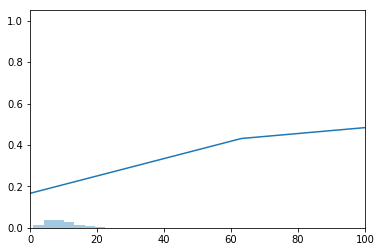

In [169]:
import seaborn as sns
plt.clf()
sns.distplot(sorted(tokens_enc_len),bins=3361,hist_kws={'cumulative':False},kde_kws={'cumulative':True})
plt.xlim(0, 100)

In [21]:
pickle.dump(obj=tokenizer,file=open('output/tokenizer.pkl','wb'))

In [4]:
for i in range(100):
    print('   ',np.quantile(tokens_enc_len,i*0.01))

    1.0
    2.0
    4.0
    4.0
    5.0
    5.0
    5.0
    6.0
    6.0
    6.0
    6.0
    7.0
    7.0
    7.0
    7.0
    8.0
    8.0
    8.0
    8.0
    9.0
    9.0
    9.0
    9.0
    9.0
    10.0
    10.0
    10.0
    11.0
    11.0
    11.0
    12.0
    12.0
    12.0
    13.0
    13.0
    14.0
    14.0
    15.0
    16.0
    17.0
    18.0
    20.0
    26.779999999998836
    40.0
    53.0
    62.05000000000109
    71.0
    80.0
    89.0
    97.0
    105.0
    114.0
    122.0
    130.0
    139.0
    147.0
    155.0
    164.0
    171.0
    179.0
    187.0
    196.0
    204.0
    214.0
    224.0
    234.85000000000218
    244.0
    255.0
    266.0
    279.0
    292.0
    306.0
    318.0
    332.0
    346.0
    361.0
    375.0
    390.0
    407.0
    422.0
    437.0
    454.0
    471.0
    490.0
    509.0
    527.0
    546.0
    565.0
    584.0
    604.0
    623.0
    646.0
    670.0
    697.3700000000026
    732.0
    775.5500000000029
    836.0
    940.0
    1106.8199999999997
    153

In [5]:
np.quantile(tokens_enc_len,0.9655)

885.0

In [6]:
trainY = training.label.tolist()
len(trainY) , len(tokens_enc)

(33610, 33610)

In [7]:
max_len = 237
train_X = []
train_Y = []
for tokens,label in zip(tokens_enc,trainY):
    length = len(tokens)
    iter_ = int(length / max_len)
    if iter_ > 0:
        temp = tokens
        for it in range(iter_):
#             bound = (it+1)*max_len
            pre = temp[:max_len]
            temp = temp[max_len:]
#             print('   ',len(pre))
            train_X.append(pre)
            train_Y.append(label)
            if (len(temp) <= max_len) and (len(temp)>=9):
#                 print('   ',len(temp))
                train_X.append(temp)
                train_Y.append(label)
    else:
        if len(tokens) >= 9:
            train_X.append(tokens)
            train_Y.append(label)
len(train_X) , len(train_Y)        

(49933, 49933)

In [8]:
len_ = [len(x) for x in train_X]
np.max(len_) , np.min(len_)

(237, 9)

In [9]:
train_X = pad_sequences(train_X, maxlen=max_len, padding= 'post' )
train_Y = np.array(train_Y)
train_X.shape , train_Y.shape

((49933, 237), (49933,))

In [144]:
# train_X = pad_sequences(tokens_enc, maxlen=361, padding= 'post' )
# train_Y = np.array(trainY)
# train_X.shape , train_Y.shape

((33610, 361), (33610,))

In [10]:
np.max(train_X)

110894

In [11]:
def split_valid_set(X_all, Y_all, percentage):
    all_data_size = len(X_all)
    valid_data_size = int(floor(all_data_size * percentage))

    X_all, Y_all = _shuffle(X_all, Y_all)

    X_train, Y_train = X_all[0:valid_data_size], Y_all[0:valid_data_size]
    X_valid, Y_valid = X_all[valid_data_size:], Y_all[valid_data_size:]

    return X_train, Y_train, X_valid, Y_valid

In [12]:
def _shuffle(X, Y):
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
#     print(X.shape, Y.shape)
    return (X[randomize], Y[randomize])

In [2]:
train_X, train_Y, valid_X, valid_Y = split_valid_set(train_X, train_Y, 0.9)

NameError: name 'split_valid_set' is not defined

Resume

In [3]:
# pickle.dump(obj=(train_X,train_Y,valid_X,valid_Y),file=open('data/train_set.pkl','wb'))
train_X, train_Y, valid_X, valid_Y = pickle.load(open('data/train_set.pkl','rb'))

## Regression model

In [4]:
max_len = train_X.shape[1]

inputs = Input(shape=(max_len,))
emb_vec = Embedding(input_dim=np.max(train_X),output_dim=128,input_length=max_len)(inputs)
conv = Conv1D(64,kernel_size=(9,), strides=1, padding='causal', data_format='channels_last')(emb_vec)
bn = BatchNormalization()(conv)
BiLSTM = Bidirectional(LSTM(64,return_sequences=True,dropout=0.1,recurrent_dropout=0.1,kernel_initializer='lecun_normal'))(bn)#64
bn = BatchNormalization()(BiLSTM)
rnn = Bidirectional(GRU(64,return_sequences=False,dropout=0.2,recurrent_dropout=0.2,kernel_initializer='lecun_normal'))(bn) #64
bn1 = BatchNormalization()(rnn) # +FC*3? selu? 64? 3rd Dense shortcut from rnn/? kernel_initializer? dropout
dense = Dense(128,activation='selu',kernel_initializer='lecun_normal')(bn1)
bn2 = BatchNormalization()(dense)
do = Dropout(0.3)(bn2)
bn = Concatenate()([do,bn1])
dense = Dense(64,activation='selu',kernel_initializer='lecun_normal')(bn)
do = Dropout(0.4)(dense)
bn = BatchNormalization()(do)
bn = Concatenate()([bn,bn2])
dense = Dense(64,activation='selu',kernel_initializer='lecun_normal')(bn)
do = Dropout(0.5)(dense)
bn = BatchNormalization()(do)
output = Dense(1,activation='relu',kernel_initializer='lecun_normal')(bn)

model = Model(inputs,output)
# model = multi_gpu_model(model,gpus=2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 237)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 237, 128)          14194432  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 237, 64)           73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 237, 64)           256       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 237, 128)          66048     
_________________________________________________________________
batch_normalization_2 (Batch (None, 237, 128)          512       
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               74112     
__________

## FIT

1st time

In [9]:
opt=Adam() #Nadam()
batchSize=2048 #32
patien=30
epoch=1000
# hidden_dims=128
# io_dim=128
# input_lengths=train_X.shape[1] #profile_Q3
# output_lengths= train_Y2.shape[1]#rep_max size
# depths=1
# dp = 0.01
saveP = 'model/Reg_keras2.h5' #1: 00010: val_mean_absolute_error improved from 0.10455 to 0.09934, saving model to model/Reg_keras.h5
logD = './model/logs/'
history = History()
print("input:",train_X.shape[1])#,'output_length:',train_Y.shape[1])

input: 237


In [11]:
# model = load_model(saveP+"_all.h5")
model.compile(optimizer=opt, loss='mse', metrics=['mae'])
callback=[
    ReduceLROnPlateau(monitor='loss', factor=0.5, patience=int(patien/3),min_lr=1e-6,mode='min' ),
    EarlyStopping(patience=patien,monitor='val_loss',verbose=1),
    ModelCheckpoint(saveP,monitor='val_mean_absolute_error',verbose=1,save_best_only=True, save_weights_only=True),
    TensorBoard(log_dir=logD), 
    history,
]
model.fit(train_X, train_Y,
                epochs=epoch,
                batch_size=batchSize,
                shuffle=True,
                validation_data=(valid_X, valid_Y),
                callbacks=callback, 
#                 class_weight='auto'
                )
model.save(saveP+"_all.h5") #184sec/0.04/0.19
# 127s 3ms/step - loss: 0.0072 - mean_absolute_error: 0.0380 - val_loss: 0.0920 - val_mean_absolute_error: 0.1414

Train on 44939 samples, validate on 4994 samples
Epoch 1/1000
44939/44939 [==============================] - 72s 2ms/step - loss: 0.0121 - mean_absolute_error: 0.0705 - val_loss: 0.0868 - val_mean_absolute_error: 0.1548

Epoch 00001: val_mean_absolute_error improved from inf to 0.15485, saving model to model/Reg_keras2.h5
Epoch 2/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0128 - mean_absolute_error: 0.0705 - val_loss: 0.0845 - val_mean_absolute_error: 0.1556

Epoch 00002: val_mean_absolute_error did not improve from 0.15485
Epoch 3/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0106 - mean_absolute_error: 0.0664 - val_loss: 0.0872 - val_mean_absolute_error: 0.1533

Epoch 00003: val_mean_absolute_error improved from 0.15485 to 0.15325, saving model to model/Reg_keras2.h5
Epoch 4/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0088 - mean_absolute_error: 0.0625 - val_loss: 0.0831 - val_mean_absolute_er


Epoch 00033: val_mean_absolute_error did not improve from 0.10512
Epoch 34/1000
44939/44939 [==============================] - 66s 1ms/step - loss: 0.0041 - mean_absolute_error: 0.0486 - val_loss: 0.0751 - val_mean_absolute_error: 0.1132

Epoch 00034: val_mean_absolute_error did not improve from 0.10512
Epoch 35/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0040 - mean_absolute_error: 0.0487 - val_loss: 0.0751 - val_mean_absolute_error: 0.1144

Epoch 00035: val_mean_absolute_error did not improve from 0.10512
Epoch 36/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0041 - mean_absolute_error: 0.0482 - val_loss: 0.0746 - val_mean_absolute_error: 0.1115

Epoch 00036: val_mean_absolute_error did not improve from 0.10512
Epoch 37/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0042 - mean_absolute_error: 0.0487 - val_loss: 0.0760 - val_mean_absolute_error: 0.1122

Epoch 00037: val_mean_absolute_error did no

44939/44939 [==============================] - 67s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0452 - val_loss: 0.0730 - val_mean_absolute_error: 0.1002

Epoch 00067: val_mean_absolute_error did not improve from 0.09991
Epoch 68/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0033 - mean_absolute_error: 0.0447 - val_loss: 0.0727 - val_mean_absolute_error: 0.1040

Epoch 00068: val_mean_absolute_error did not improve from 0.09991
Epoch 69/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0032 - mean_absolute_error: 0.0439 - val_loss: 0.0729 - val_mean_absolute_error: 0.1033

Epoch 00069: val_mean_absolute_error did not improve from 0.09991
Epoch 70/1000
44939/44939 [==============================] - 67s 1ms/step - loss: 0.0032 - mean_absolute_error: 0.0443 - val_loss: 0.0733 - val_mean_absolute_error: 0.1031

Epoch 00070: val_mean_absolute_error did not improve from 0.09991
Epoch 71/1000
44939/44939 [==============================]

2nd time
* fix back lyers
* lower lr
* lower patience

In [12]:
opt=Nadam(lr=0.0009) 
batchSize=512
patien=15
epoch=100
# hidden_dims=128
# io_dim=128
# input_lengths=train_X.shape[1] #profile_Q3
# output_lengths= train_Y2.shape[1]#rep_max size
# depths=1
# dp = 0.01
saveP = 'model/Reg_keras2.h5' #2: val_mean_absolute_error did not improve from 0.10362
logD = './model/logs/'
history = History()
print("input:",train_X.shape[1])#,'output_length:',train_Y.shape[1])

input: 237


In [13]:
# model = load_model(saveP+"_all.h5")
model.load_weights(saveP)
model = multi_gpu_model(model,gpus=2)
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

callback=[
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=int(patien/1.5),min_lr=1e-6,mode='min' ),
    EarlyStopping(patience=patien,monitor='val_loss',verbose=1),
    ModelCheckpoint(saveP,monitor='val_mean_absolute_error',verbose=1,save_best_only=True, save_weights_only=True),
    TensorBoard(log_dir=logD), 
    history,
]
model.fit(train_X, train_Y,
                epochs=epoch,
                batch_size=batchSize,
                shuffle=True,
                validation_data=(valid_X, valid_Y),
                callbacks=callback, 
                class_weight='auto'
                )
model.save(saveP+"_all.h5")

Train on 44939 samples, validate on 4994 samples
Epoch 1/100
44939/44939 [==============================] - 316s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0558 - val_loss: 0.0741 - val_mean_absolute_error: 0.1188

Epoch 00001: val_mean_absolute_error improved from inf to 0.11881, saving model to model/Reg_keras2.h5
Epoch 2/100
44939/44939 [==============================] - 305s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0575 - val_loss: 0.0706 - val_mean_absolute_error: 0.1224

Epoch 00002: val_mean_absolute_error did not improve from 0.11881
Epoch 3/100
44939/44939 [==============================] - 305s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0569 - val_loss: 0.0754 - val_mean_absolute_error: 0.1106

Epoch 00003: val_mean_absolute_error improved from 0.11881 to 0.11057, saving model to model/Reg_keras2.h5
Epoch 4/100
44939/44939 [==============================] - 306s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0558 - val_loss: 0.0714 - val_mean_absolute_er

In [18]:
model2 = load_model('model/Reg_keras2.h5_all.h5')
model2.load_weights('model/Reg_keras2.h5')
model2.evaluate(valid_X,valid_Y)

4994/4994 [==============================] - 210s 42ms/step


[0.06722560542694177, 0.10202433797875833]

## Testing
original:
* 0 => fake
* 1 => true

In [14]:
tokenizer = pickle.load(open('output/tokenizer.pkl','rb'))
testing = pd.read_csv('result/testing_kaggle.csv')
test_list = testing['text'].astype(str).tolist()
test_id = testing.id.astype(int).tolist()
test_data = tokenizer.texts_to_sequences(test_list)
len(test_data) , len(test_id)

(5200, 5200)

In [15]:
max_len = 237
test_X = []
test_ID = []
for tokens,id_ in zip(test_data,test_id):
    length = len(tokens)
    iter_ = int(length / max_len)
    if iter_ > 0:
        temp = tokens
        for it in range(iter_):
#             bound = (it+1)*max_len
            pre = temp[:max_len]
            temp = temp[max_len:]
#             print('   ',len(pre))
            test_X.append(pre)
            test_ID.append(id_)
            if (len(temp) <= max_len) and (len(temp)>=9):
#                 print('   ',len(temp))
                test_X.append(temp)
                test_ID.append(id_)
    else:
#         if len(tokens) >= 9:
        test_X.append(tokens)
        test_ID.append(id_)
len(test_X) , len(test_ID) 

(10856, 10856)

In [16]:
test_X = pad_sequences(test_X, maxlen=max_len, padding= 'post' )
test_ID = np.array(test_ID)
test_X.shape , test_ID.shape

((10856, 237), (10856,))

In [73]:
len(set(test_ID))

5200

predict 1

In [17]:
model = load_model('model/Reg_keras.h5_all.h5')
model.load_weights('model/Reg_keras.h5')
ans1 = model.predict(test_X)

In [18]:
ans1

array([[0.9977354 ],
       [0.9962249 ],
       [0.99586725],
       ...,
       [0.99617416],
       [0.99723536],
       [0.9980172 ]], dtype=float32)

In [19]:
ans1.shape

(10856, 1)

predict 2 

In [20]:
model2 = load_model('model/Reg_keras2.h5_all.h5')
model2.load_weights('model/Reg_keras2.h5')
ans2 = model2.predict(test_X)

In [21]:
ans2.shape

(10856, 1)

combine
* 1 => fake
    * <=0.5 -> 1
* 0 => true
    * \>0.5 -> 0

In [22]:
ans = (ans1 + ans2)/2
ans = np.squeeze(ans)
ans_df = pd.DataFrame(data={'id':list(test_ID),'score':list(ans)})
ans_df

,id,score
0,20800,0.999392
1,20800,0.998562
2,20800,0.998482
3,20801,0.004707
4,20802,0.005377
5,20802,0.003506
6,20803,0.999858
7,20803,0.997517
8,20804,0.003488
9,20805,0.005277


In [23]:
def transfer_bin(s):
#     print(df.score)
    if s>0.5:
        return 0
    else:
        return 1

In [24]:
# ans_df['label']=1
ans_df = ans_df.groupby('id').mean().reset_index()
ans_df['label'] = ans_df['score'].apply(transfer_bin)
ans_df


,id,score,label
0,20800,0.998812,0
1,20801,0.004707,1
2,20802,0.004441,1
3,20803,0.998688,0
4,20804,0.003488,1
5,20805,0.005277,1
6,20806,0.999990,0
7,20807,0.226817,1
8,20808,0.005155,1
9,20809,0.581511,0


In [27]:
# ans_df.drop('score',axis=1,inplace=True)
ans_df.to_csv('output/kaggle_testing3.csv',index=False)

In [88]:
ans_df.label.sum()

2539

## User input

In [28]:
tokenizer = pickle.load(open('output/tokenizer.pkl','rb'))
model = load_model('model/Reg_keras.h5_all.h5')
model.load_weights('model/Reg_keras.h5')
model2 = load_model('model/Reg_keras2.h5_all.h5')
model2.load_weights('model/Reg_keras2.h5')

In [29]:
with open('data/stop_words.txt') as f:
    stop_words_list = f.read().splitlines() #stop_list1
stop_list2 = pickle.load(open('data/stop_list2.pkl','rb'))
ps = PorterStemmer() # Stemming
stop_words = set(stopwords.words('english')) #Stopword
short = ['.', ',', '"', "\'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', "'at",
         "_","`","\'\'","--","``",".,","//",":","___",'_the','-',"'em",".com",
                   '\'s','\'m','\'re','\'ll','\'d','n\'t','shan\'t',"...","\'ve",'u']
stop_words_list.extend(short)
stop_words_list.extend(stop_list2)
stop_words.update(stop_words_list)

In [30]:
def preprocess(texts):
    tokens = [i for i in word_tokenize(texts.lower()) if i not in stop_words]  # Tokenization.# Lowercasing
    token_result = ''
    token_result_ = ''
    for i,token in enumerate(tokens): #list2str
        token_result += ps.stem(token) + ' '
    token_result = ''.join([i for i in token_result if not i.isdigit()])
    token_result = [i for i in word_tokenize(token_result) if i not in stop_words]
    for i,token in enumerate(token_result):
        token_result_ += token + ' '
    return token_result_

In [152]:
test_text = input('Enter a news content(text length should > 9): ')

Enter a news content(text length should > 9): The United States is at historic record highs of individuals being apprehended on the border from countries with terrorist ties such as Pakistan or Afghanistan or Syria.


In [153]:
test_list = [str(test_text)]
test_df = pd.DataFrame(data={'text':test_list})
test_list = test_df['text'].apply(preprocess).tolist()
test_id = [0]
test_data = tokenizer.texts_to_sequences(test_list)
# len(test_data) , len(test_id)

In [154]:
max_len = 237
test_X = []
test_ID = []
for tokens,id_ in zip(test_data,test_id):
    length = len(tokens)
    iter_ = int(length / max_len)
    if iter_ > 0:
        temp = tokens
        for it in range(iter_):
#             bound = (it+1)*max_len
            pre = temp[:max_len]
            temp = temp[max_len:]
#             print('   ',len(pre))
            test_X.append(pre)
            test_ID.append(id_)
            if (len(temp) <= max_len) and (len(temp)>=9):
#                 print('   ',len(temp))
                test_X.append(temp)
                test_ID.append(id_)
    else:
#         if len(tokens) >= 9:
        test_X.append(tokens)
        test_ID.append(id_)
# len(test_X) , len(test_ID) 

In [155]:
test_X = pad_sequences(test_X, maxlen=max_len, padding= 'post' )
test_ID = np.array(test_ID)
# test_X.shape , test_ID.shape

In [156]:
ans1 = model.predict(test_X)
ans2 = model2.predict(test_X)

In [157]:
ans = (ans1 + ans2)/2
ans = np.squeeze(ans)
try:
    ans_df = pd.DataFrame(data={'id':[int(test_ID)],'score':[float(ans)]})
except:
    ans_df = pd.DataFrame(data={'id':test_ID,'score':list(ans)})
ans_df = ans_df.groupby('id').mean().reset_index()
ans = float(ans_df.score.values)
ans

0.025374526157975197

In [159]:
if ans < 0.1:
    print(' ','I got you! Lier,Lier,Pants on Fire!!')
elif ans <= 0.2:
    print(' ','Oh!You are fake news!')
elif ans <0.4:
    print(' ','Well..It\'s mostly fake though..')
elif ans <=0.6:
    print(' ','Hm~~It\'s half-true and half-fake...')
elif ans <=0.9:
    print(' ','Um~It\'s mostly true^^')
else:
    print(' ','It\'s a true story~~!!')

  I got you! Lier,Lier,Pants-on-Fire!!
